# Stroke Prediction Project

## Libraries

In [ ]:
import pandas as pd  # Data manipulation and processing
import numpy as np  # Linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix,precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# from catboost import CatBoostClassifier
import plotly.figure_factory as ff
from sklearn.semi_supervised import LabelPropagation
from sklearn.cluster import KMeans
from tabulate import tabulate
from imblearn.over_sampling import SMOTE


In [ ]:
# Functions used in the following Modelling

# Plot a histogram of a given column
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    """
    Plot a histogram of a given column.

    Parameters:
    col (pd.Series or array-like): Column data to be plotted.
    bins (int): Number of bins for the histogram (default is 30).
    title (str): Title of the histogram plot.
    xlabel (str): Label for the x-axis.
    ax (matplotlib.axes._axes.Axes): Matplotlib axes object for plotting. If not provided, a new axes will be created.
    """
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

# Plot a confusion matrix as an annotated heatmap
def plot_cm(cm,title):
    """
    Plot a confusion matrix as an annotated heatmap.

    Parameters:
    cm (array-like): Confusion matrix data.
    title (str): Title for the plot.
    """
    z = cm
    x = ['No stroke', 'stroke']
    y = x
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='deep')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title),
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':0.5,
                            'y':-0.10,
                            'showarrow':False,
                            'text':"Predicted value",
                            'xref':"paper",
                            'yref':"paper"})

    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':-0.15,
                            'y':0.5,
                            'showarrow':False,
                            'text':"Real value",
                            'textangle':-90,
                            'xref':"paper",
                            'yref':"paper"})


    # adjust margins to make room for yaxis title
    fig.update_layout(margin={'t':50, 'l':20},width=750,height=750)



    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()

# Plot bar plots of model accuracies compared to the baseline accuracy
def hist_score(score,accuracy_baseline):
    """
    Plot bar plots of model accuracies compared to the baseline accuracy.

    Parameters:
    score (list or array-like): List of model scores (accuracies).
    """

    models_names = [
    'Logistic Regression',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'Label Propagation']

    plt.rcParams['figure.figsize']=20,8
    sns.set_style('darkgrid')
    ax = sns.barplot(x=models_names, y=score, color='lightblue')
    plt.axhline(y=accuracy_baseline, color='r', linestyle='--', label='Baseline', linewidth=2)  # Display baseline accuracy as dashed line
    plt.title(f'Model Accuracies vs. Baseline ({accuracy_baseline})')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    # Add baseline accuracy label at the baseline line

    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy()
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()


# Run experiments on various machine learning models and evaluate their performance
def run_exp_on_feature(x_train,y_train,x_test,y_test):
    """
    Run experiments on various machine learning models and evaluate their performance.

    Parameters:
    x_train (pd.DataFrame): Training feature data.
    y_train (pd.Series or array-like): Training target labels.
    x_test (pd.DataFrame): Test feature data.
    y_test (pd.Series or array-like): Test target labels.

    Returns:
    models_score (list): List of accuracies for each model.
    """
    #x_train,x_test,y_train,y_test = train_test_split(features,labels, test_size=0.2, random_state=23)
    models= [['Logistic Regression',LogisticRegression()],
            ['Decision Tree Classifier',DecisionTreeClassifier()],
            ['Random Forest Classifier',RandomForestClassifier()],
            ['Label Propagation', LabelPropagation()]]
#             ['KMeans', KMeans(n_clusters=3)]]

    metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
    for name,model in models:

        model = model
        model.fit(x_train,y_train)
        model_pred = model.predict(x_test)
        cm_model = confusion_matrix(y_test, model_pred)
        print(cm_model)
        accuracy = accuracy_score(y_test, model.predict(x_test))
        precision = precision_score(y_test, model.predict(x_test))
        recall = recall_score(y_test, model.predict(x_test))
        f1 = f1_score(y_test, model.predict(x_test))

        metrics_dict['Model'].append(name)
        metrics_dict['Accuracy'].append(accuracy)
        metrics_dict['Precision'].append(precision)
        metrics_dict['Recall'].append(recall)
        metrics_dict['F1 Score'].append(f1)


        print(name)
        print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
        print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))
        print('############################################')
        plot_cm(cm_model,title=name)
        fpr, tpr, thresholds = roc_curve(y_test, model_pred)

        fig = px.area(
            x=fpr, y=tpr,
            title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
            labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
            width=700, height=500
        )
        fig.add_shape(
            type='line', line={'dash':'dash'},
            x0=0, x1=1, y0=0, y1=1
        )

        fig.update_yaxes(scaleanchor="x", scaleratio=1)
        fig.update_xaxes(constrain='domain')
        fig.show()


    return metrics_dict

def get_comparision_table(models_score):
    # Create a DataFrame from the metrics dictionary
    metrics_df = pd.DataFrame(models_score)

    # Display the metrics DataFrame as a visual table using tabulate
    table = tabulate(metrics_df, headers='keys', tablefmt='grid')
    print(table)

    # Display the metrics DataFrame as a visual table using IPython display
    display(metrics_df)





In [ ]:
# Load dataset from umeshkhatiwada13/Datasets github repo
df = pd.read_csv('https://raw.githubusercontent.com/umeshkhatiwada13/Datasets/main/healthcare-dataset-stroke-data_5k.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Data Pre_Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In the current dataset, there are 11 features and one binary target. A brief information about the features are given below

    id: Identification number of the individual.
    gender: Gender of the individual.
    hypertension: Health related parameter, does person have hypertension.
    heart_disease: Health related parameter, does person have heart disease.
    ever_married: Personal information, is person married on not?
    work_type: Nature of work place.
    Residence_type: Residence type of the individual.
    avg_glucose_level: average glucose level in blood for the individual.
    bmi: body mass index of the individual.
    smoking_status: Habitual information. Current smoking status of individual.
    stroke: Our taget, Has person had Stroke?


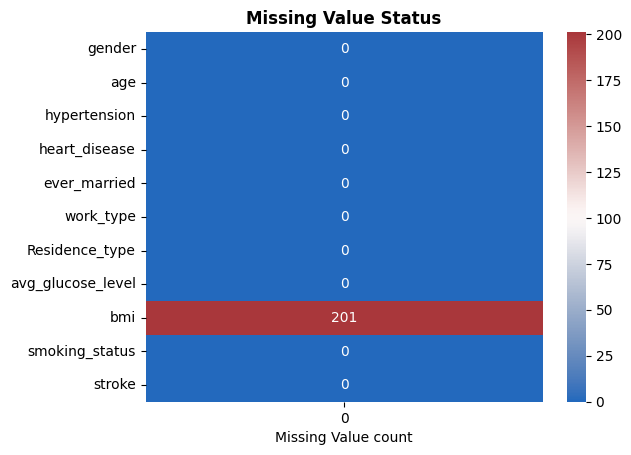

In [ ]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Missing Value count')
plt.show()

In [ ]:
DT_bmi_pipe = Pipeline( steps=[
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

Initially, the dataset had 201 samples with absent BMI value; rather than imputing it naively with the mean or the median, we used a simple decision tree model which based on the age and gender of all other samples gave us a fair prediction for the missing values.

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

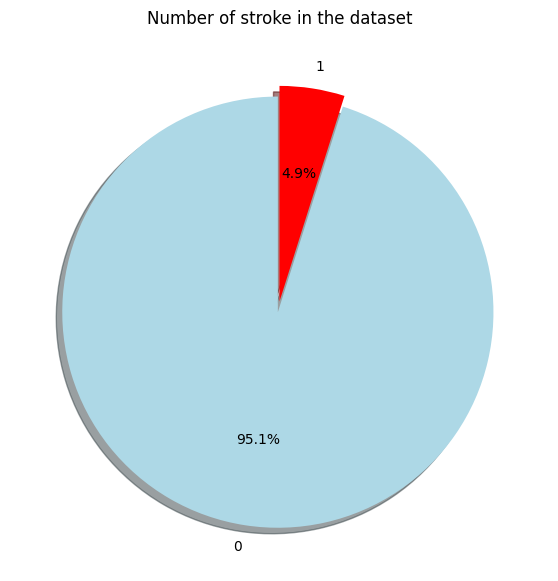

In [ ]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

In [ ]:
#  Using Lable encoding
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,349,1,1
1,0,82,0,0,1,3,0,3588,215,2,1
2,1,101,0,1,1,2,0,2483,294,2,1
3,0,70,0,0,1,2,1,3385,325,3,1
4,0,100,1,0,1,3,0,3394,127,2,1


Just by this brief looking we report two things this dataset is very unbanlaced and also we go some missing values on the BMI feauture.

Before using any modeling we should solve issues

## Exploratory data analysis (EDA)

<ipython-input-233-ee87336e4703>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-233-ee87336e4703>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-233-ee87336e4703>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to 

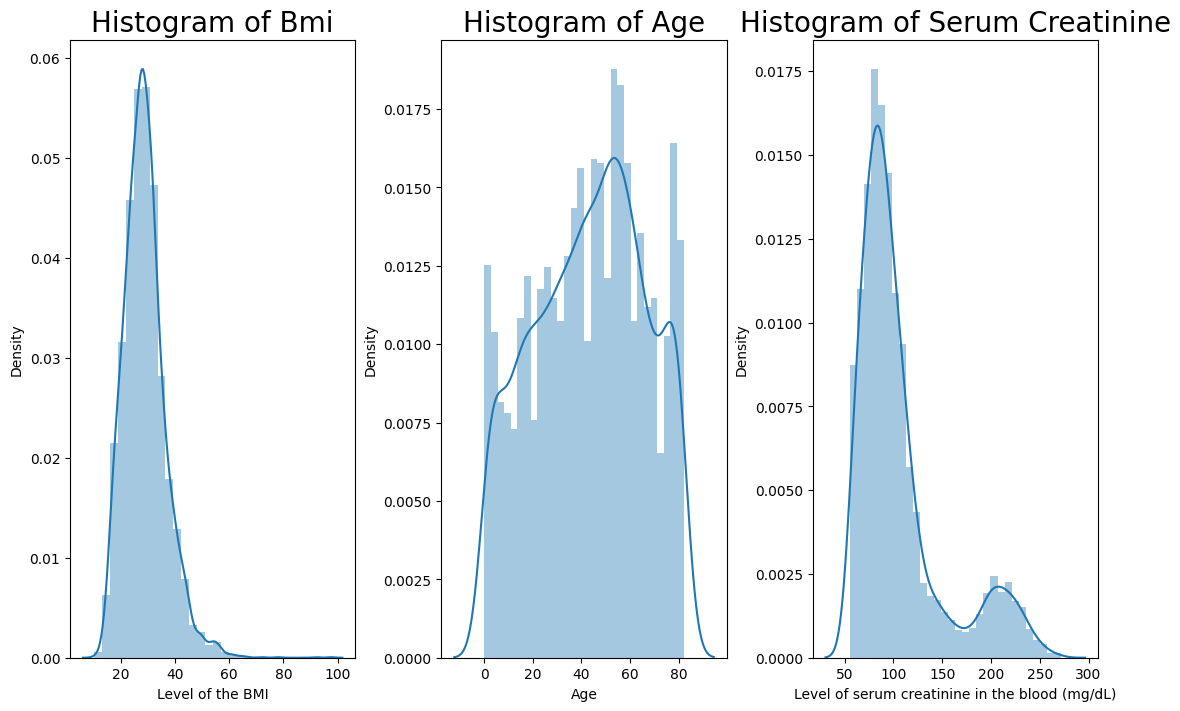

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='Serum Creatinine',
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[2])

plt.show()

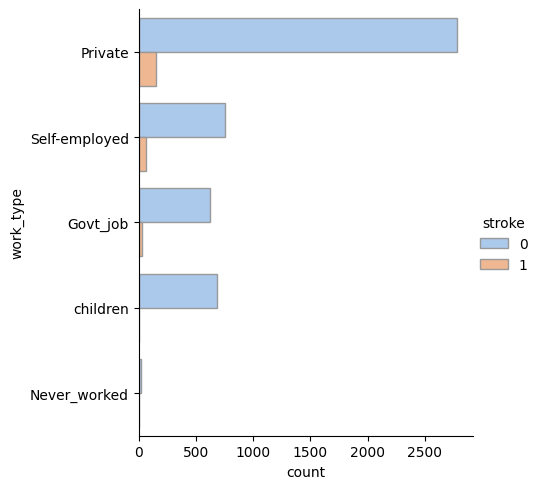

In [ ]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

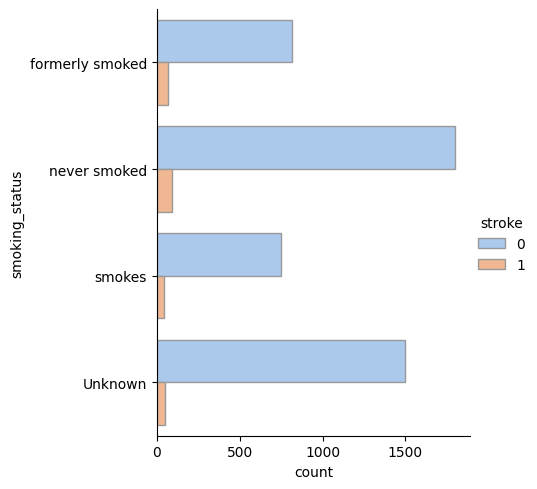

In [ ]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

Observation.
1. In term of proportion private and self-employed have the similar amount of people having a stroke. However people from the gouvernment are more likely to not have a stroke compared to both first gategories moreover chlidren are not very likekly to get a stroke. Maybe that could be explain due to the degree of pressure felt by workers

2. Surprisingly, it seems that the stroke is not highly corralated to smokers since the proportion of person having a stroke is fairly the same among the different smoking status.

<Figure size 1700x700 with 0 Axes>

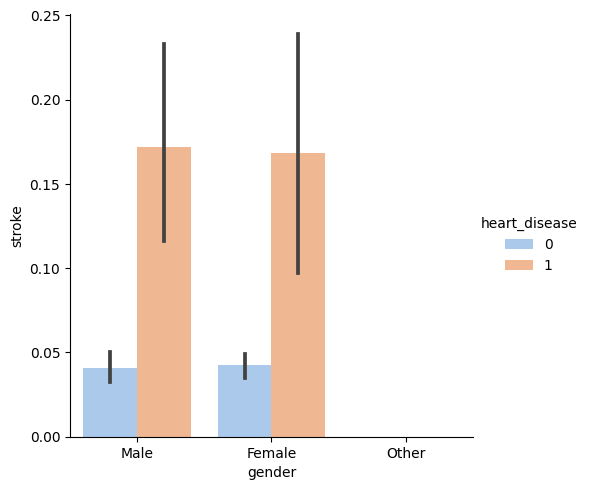

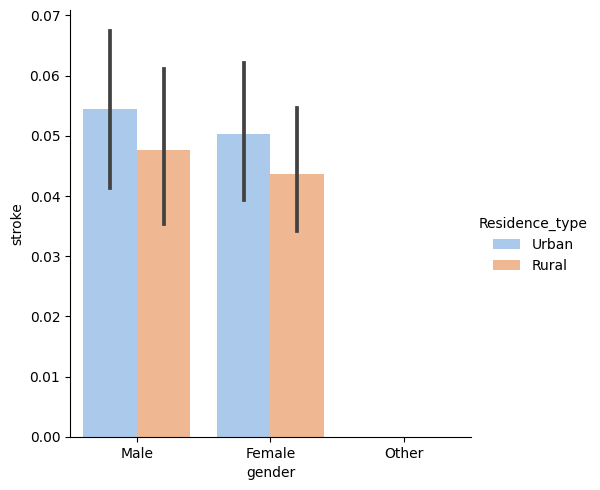

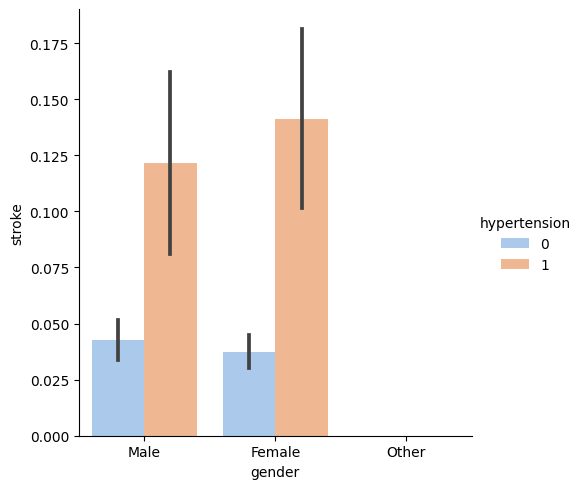

In [ ]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=df)
plt.show()

Observation.
 1. We can see from the plots that the gender is not a feature that descriminate a person having a stroke or not.

 2. Hypertension and heart disease features are correlated to stroke as we could expect.

 3. Rural person are less prone to strole than urban people, it seems that the polution is a correlatede to having stroke.

In [ ]:

len_data = len(df)
len_w = len(df[df["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(df.loc[(df["stroke"]==1)&(df['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(df.loc[(df["stroke"]==1) & (df['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of stroke EVENT according to their gender")
fig.show()

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
## Feature Correlation to target

In [ ]:
fig = px.parallel_categories(df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke']], color='stroke', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

<ipython-input-252-8e0699edc880>:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-252-8e0699edc880>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




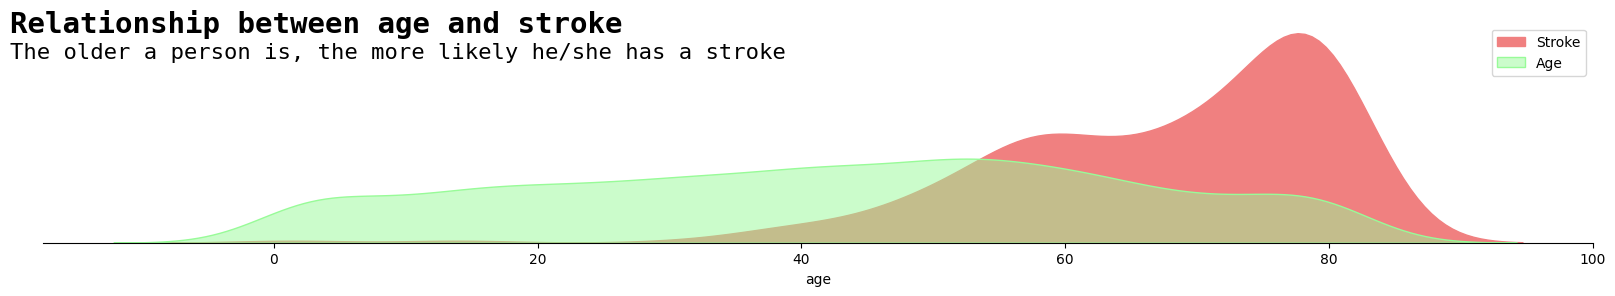

In [ ]:
fig=plt.figure(figsize=(20,8),facecolor='white')

ax=[None for i in range(2)]
gs=fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])

ax[0].text(-20,0.04,'Relationship between age and stroke',fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-20,0.035,'The older a person is, the more likely he/she has a stroke',fontsize=16,fontweight='light', fontfamily='monospace')

sns.kdeplot(data=df[df.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1, label='Stroke')
sns.kdeplot(data=df[df.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5, label='Age')
ax[0].set_yticklabels('')
ax[0].set_ylabel('')
ax[0].tick_params(axis='y',length=0)

for direction in ['top','right','left']:
    ax[0].spines[direction].set_visible(False)

ax[0].legend()
plt.show()


In [ ]:
import plotly.express as px

fig = make_subplots(
    rows=2, cols=2, subplot_titles=('', '<b>Distribution Of Female Ages<b>', '<b>Distribution Of Male Ages<b>', 'Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie", "rowspan": 2}, {"type": "histogram"}],
           [None, {"type": "histogram"}],
          ]
)

fig.add_trace(
    go.Pie(values=df.gender.value_counts().values, labels=['<b>Female<b>', '<b>Male<b>', '<b>Other<b>'], hole=0.3, pull=[0, 0.08, 0.3], marker_colors=['pink', 'lightblue', 'green'], textposition='inside'),
    row=1, col=1
)

# Create histograms using Plotly Express with distinct colors
fig.add_trace(
    go.Histogram(
        x=df.query('gender=="Female"').age,
        marker_color='#E7554F',
        opacity=0.7,
        name='Female Ages'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(
        x=df.query('gender=="Male"').age,
        marker_color='#2176AE',
        opacity=0.7,
        name='Male Ages'
    ),
    row=2, col=2
)

fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Inference<b>",
)

fig.show()


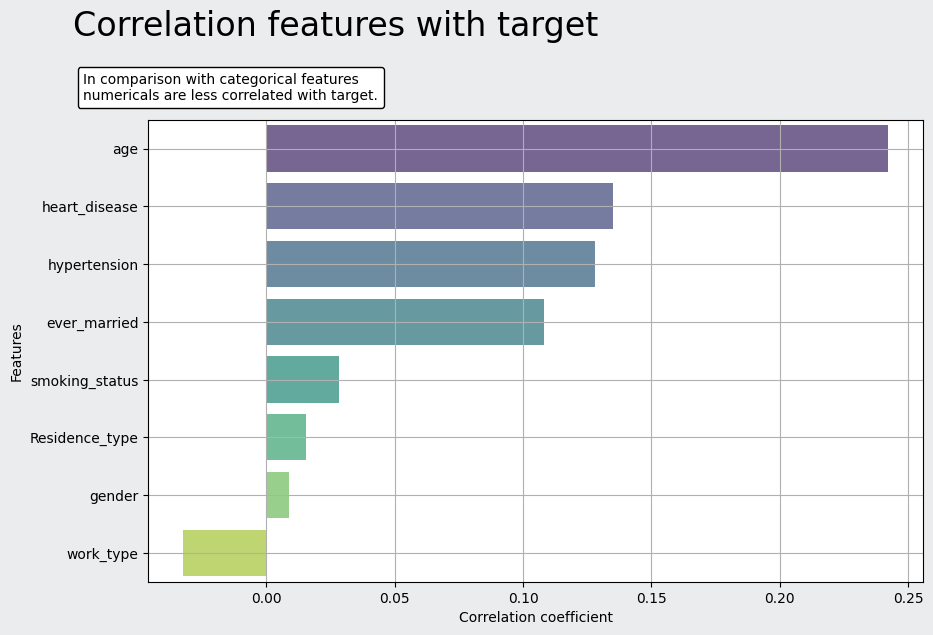

In [ ]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features",
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

<ipython-input-258-43b181235e54>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

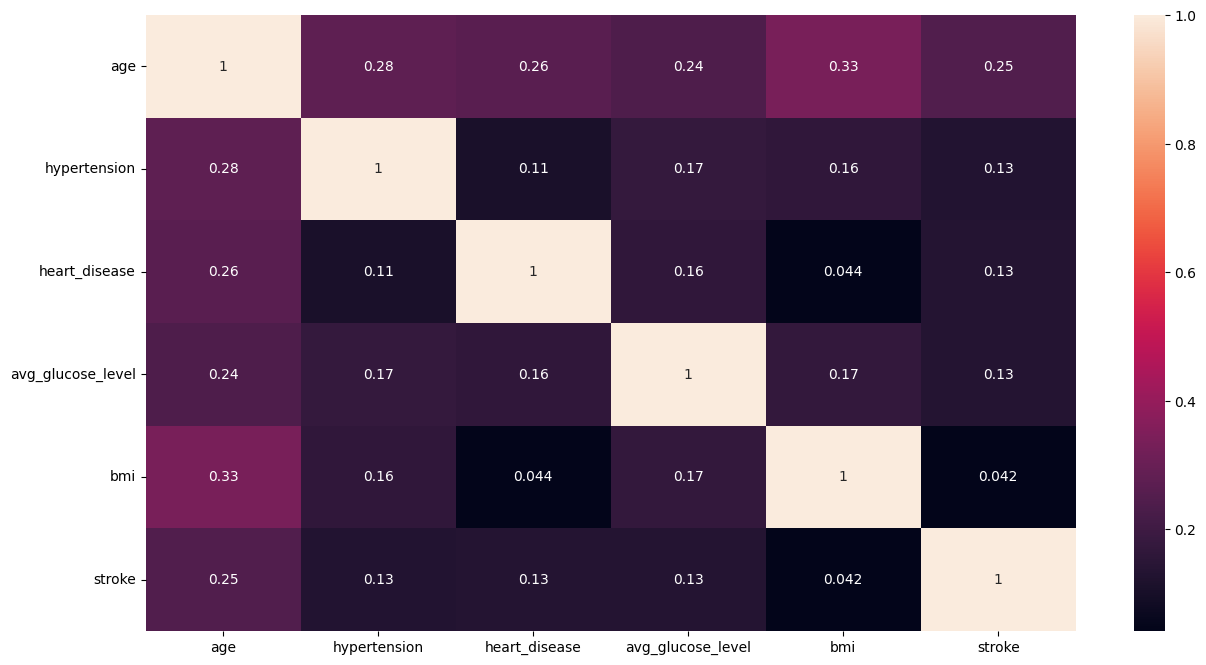

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

Feature ranking:
1. feature 1 (0.681038)
2. feature 7 (0.107527)
3. feature 5 (0.068106)
4. feature 3 (0.030871)
5. feature 0 (0.030857)
6. feature 2 (0.029756)
7. feature 6 (0.027659)
8. feature 4 (0.024185)


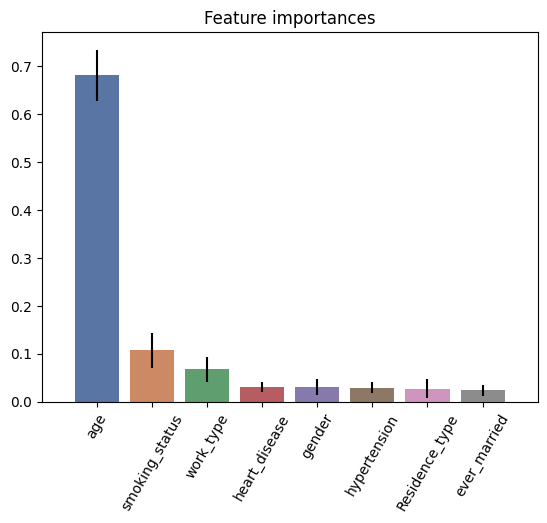

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

X = en_df[features]
y = en_df['stroke']
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



# Plot the impurity-based feature importances of the forest
plt.figure()

plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()

# **Data Visualization**

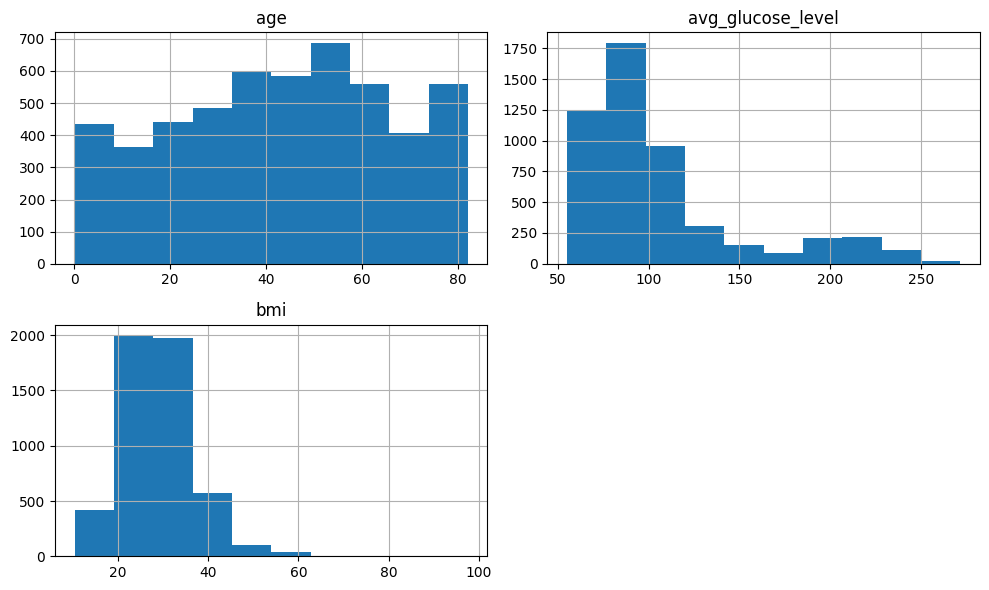

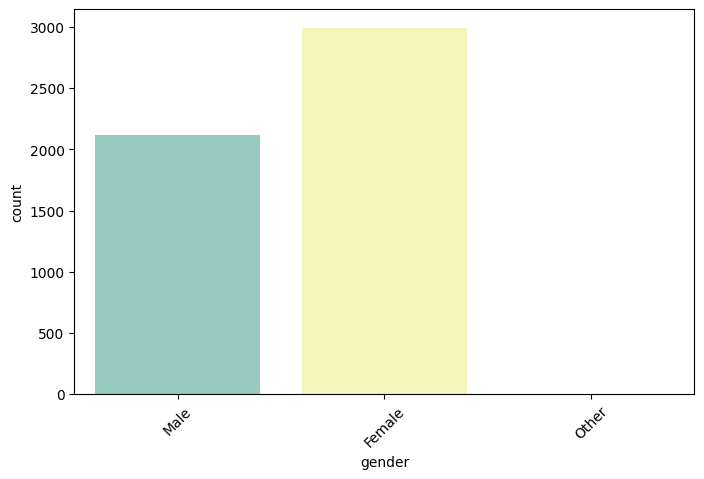

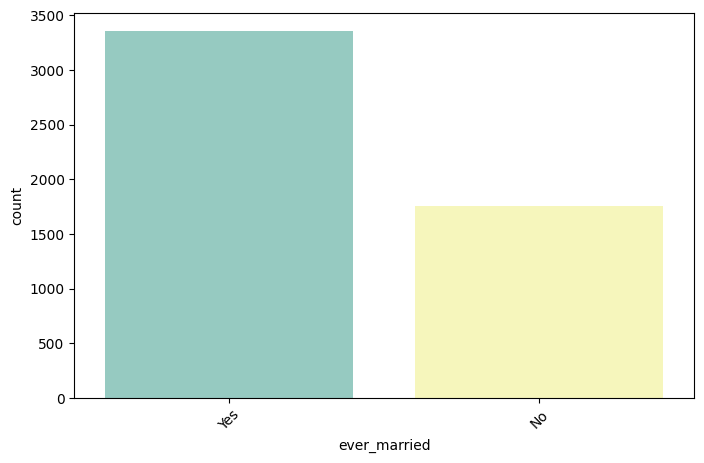

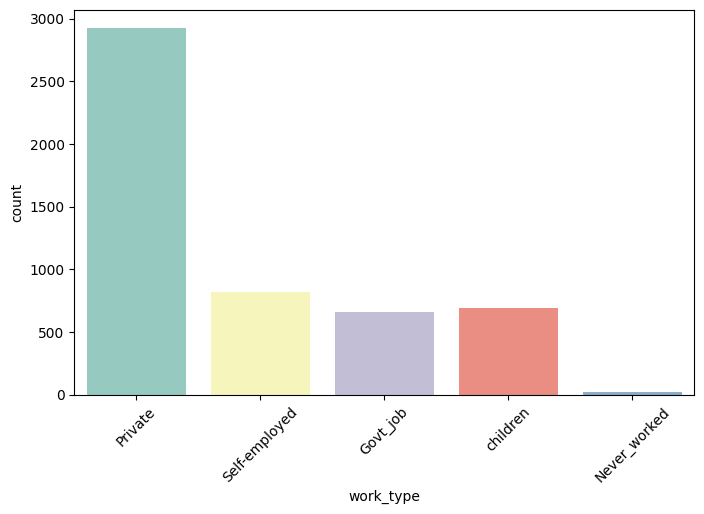

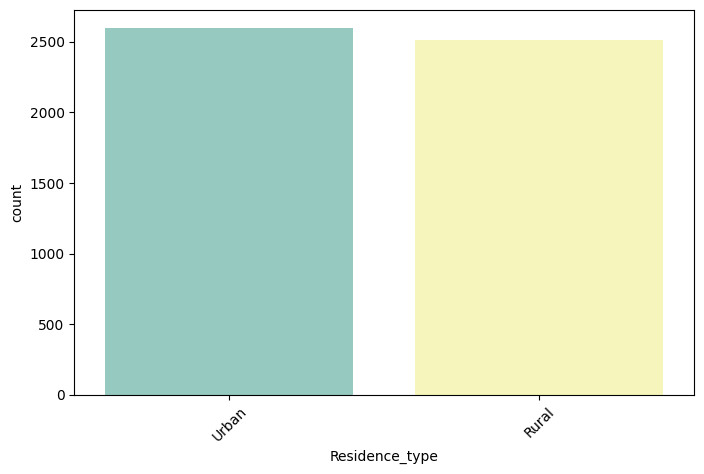

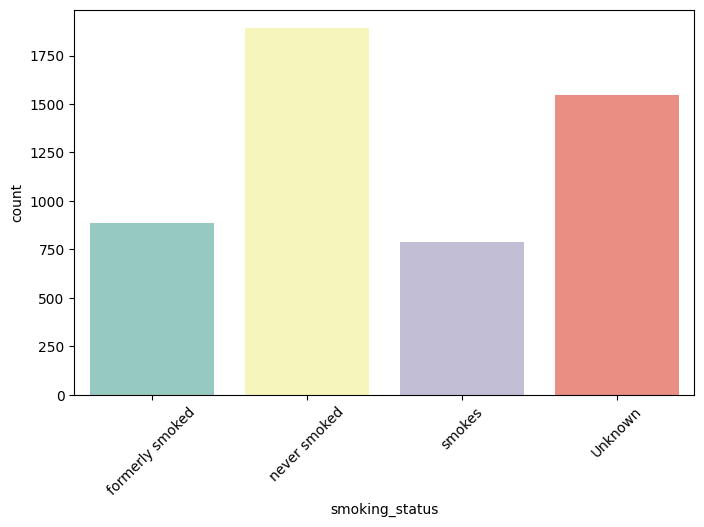

<ipython-input-260-6a62b2a5830e>:16: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



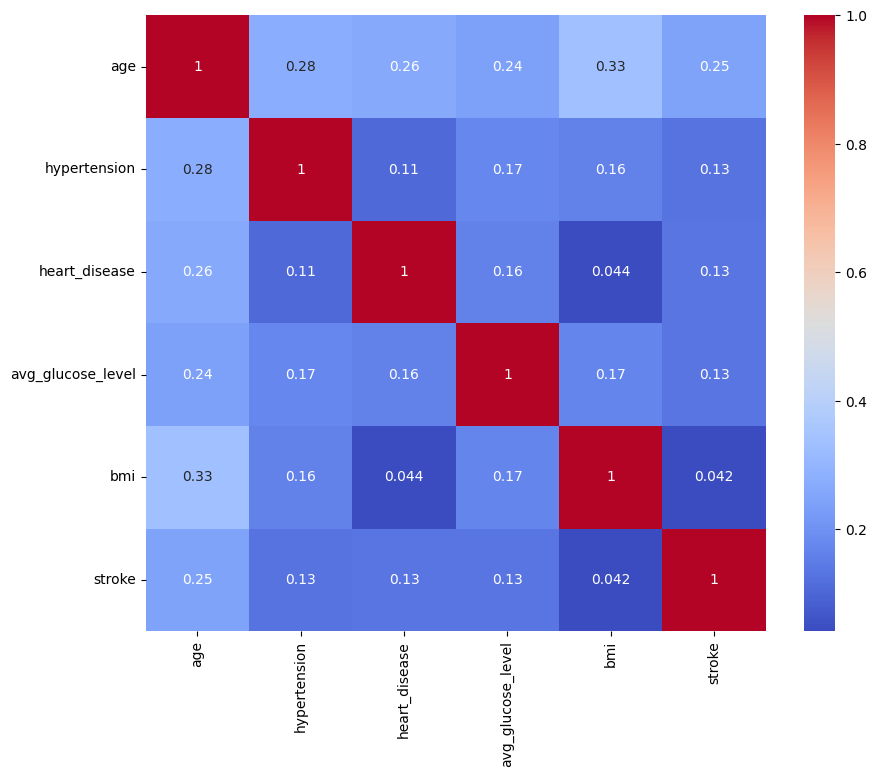

In [ ]:
# Numerical Data Visualization
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
df[numerical_cols].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Categorical Data Visualization
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette="Set3")
    plt.xticks(rotation=45)
    plt.show()

# Relationship Visualization
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Interactive Visualization
interactive_plot = px.scatter(df, x='age', y='avg_glucose_level', color='stroke', title='Age vs. Avg Glucose Level')
interactive_plot.show()

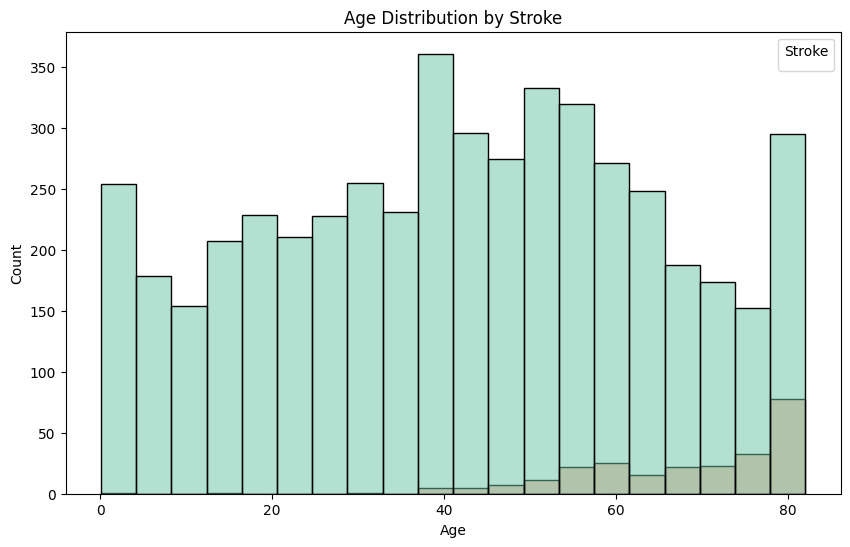

In [ ]:
# Age Distribution by Stroke
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='stroke', bins=20, palette='Set2')
plt.title('Age Distribution by Stroke')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

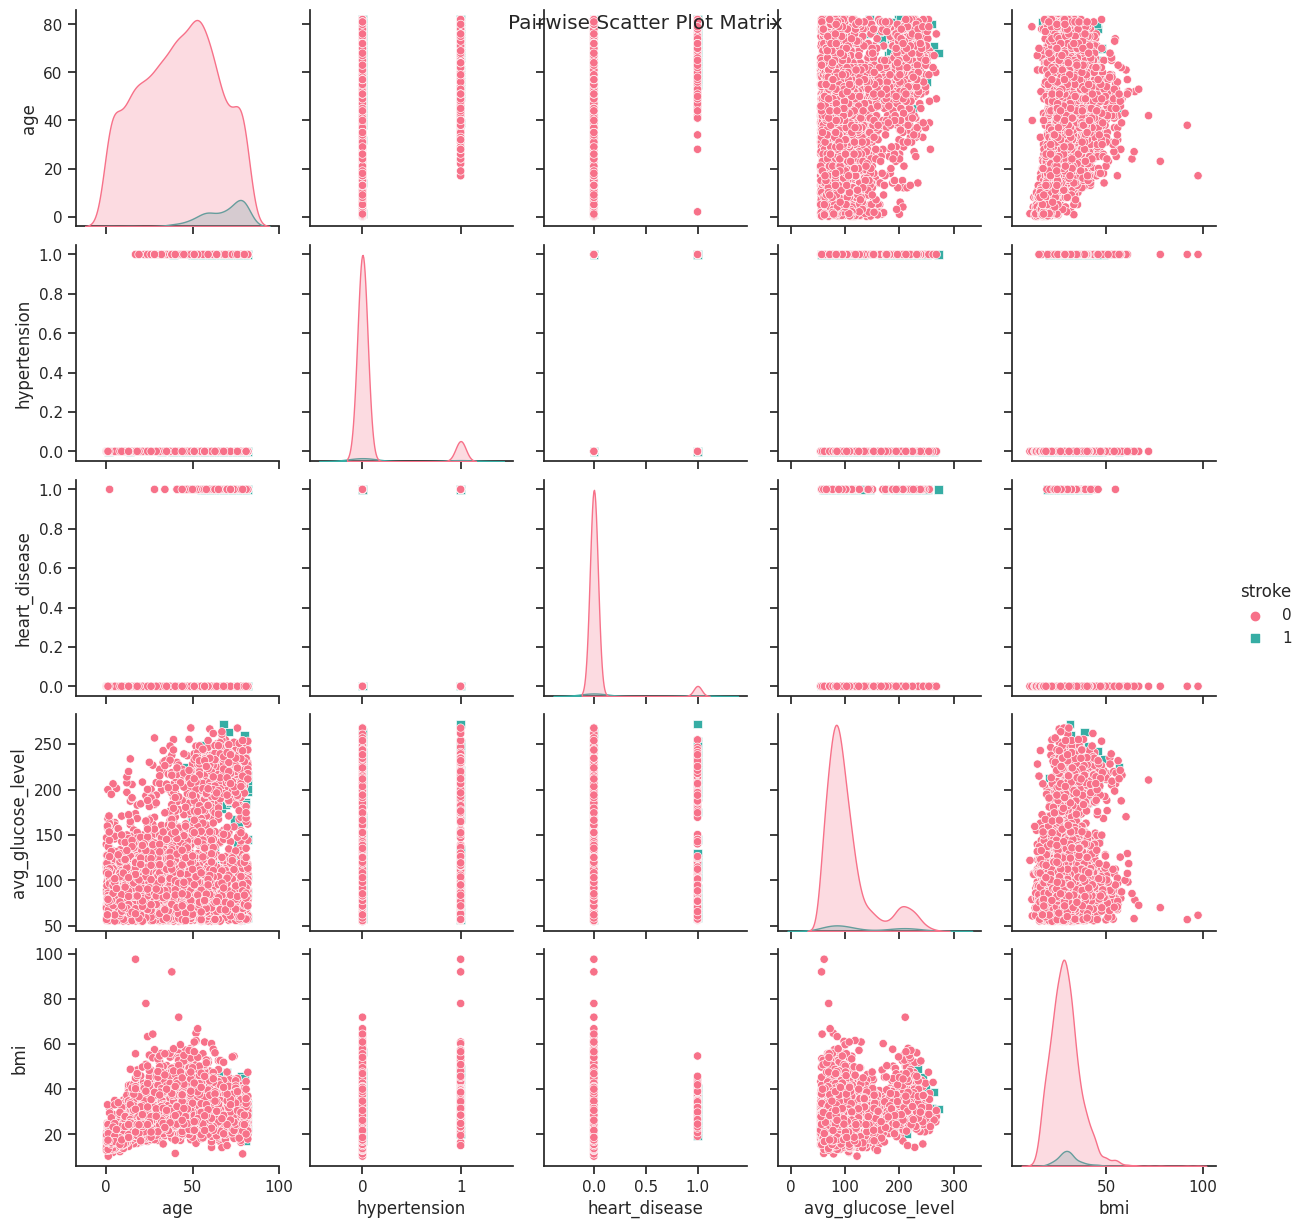

In [ ]:
# Pairwise Scatter Plot Matrix: Is a set of scatter plots that visualize the relationships between pairs of numerical variables in our dataset.
sns.set(style="ticks")
sns.pairplot(df, hue="stroke", diag_kind="kde", markers=["o", "s"], palette="husl")
plt.suptitle("Pairwise Scatter Plot Matrix")
plt.show()

In [ ]:
X , y = en_df[features],en_df["stroke"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

# Calculate baseline accuracy
accuracy_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", accuracy_baseline)

Baseline Accuracy: 0.9525440313111546


## Modeling

In [ ]:
models_score = run_exp_on_feature(x_train,y_train,x_test,y_test)

[[967   0]
 [ 55   0]]
Logistic Regression
Validation Acuuracy:  0.9461839530332681
Training Accuracy:  0.9525440313111546
############################################


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



[[940  27]
 [ 52   3]]
Decision Tree Classifier
Validation Acuuracy:  0.9227005870841487
Training Accuracy:  0.9809197651663405
############################################


[[948  19]
 [ 53   2]]
Random Forest Classifier
Validation Acuuracy:  0.9295499021526419
Training Accuracy:  0.9806751467710372
############################################


[[947  20]
 [ 53   2]]
Label Propagation
Validation Acuuracy:  0.9285714285714286
Training Accuracy:  0.9809197651663405
############################################


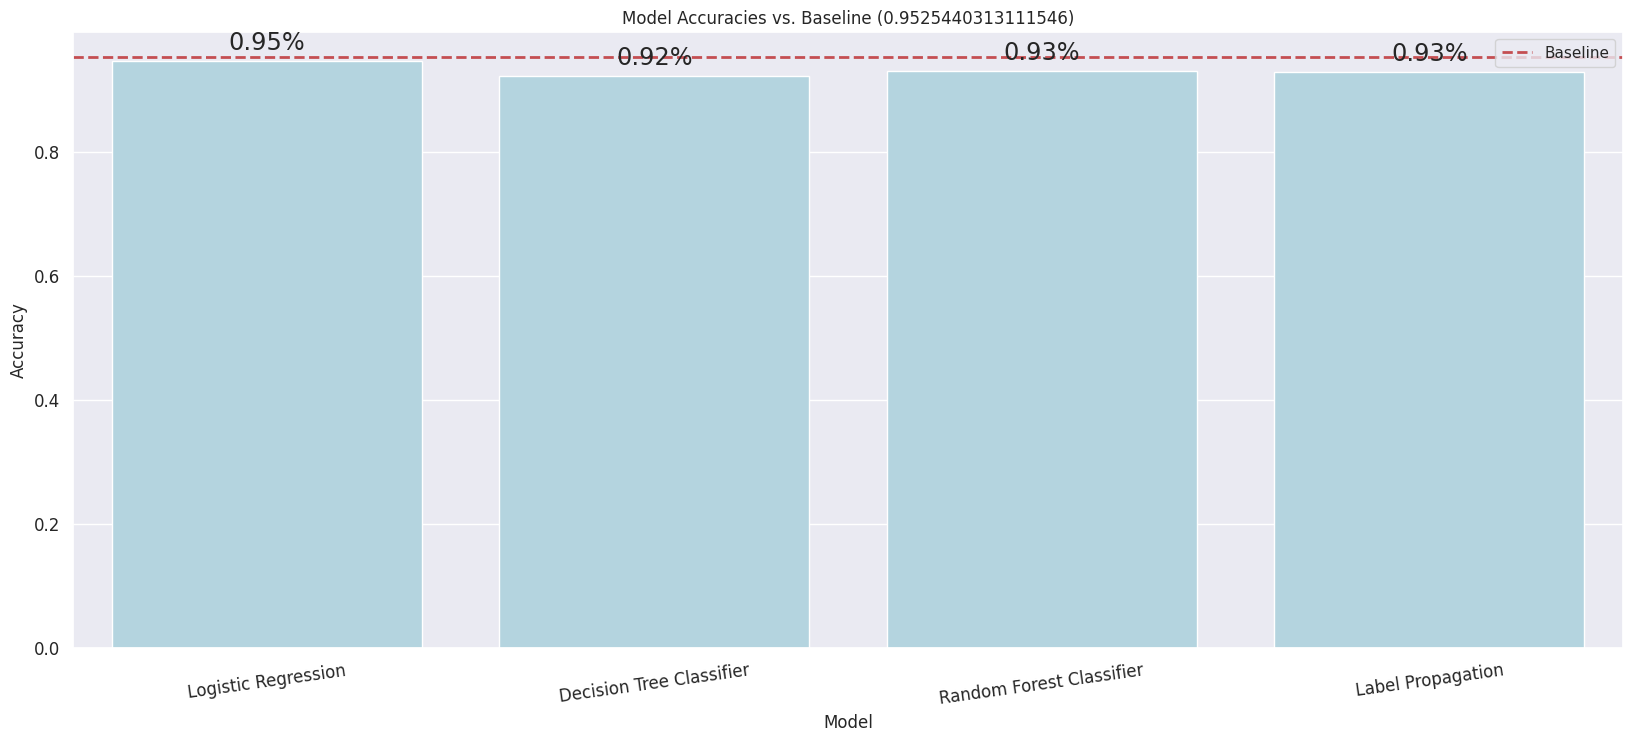

{'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Label Propagation'], 'Accuracy': [0.9461839530332681, 0.9227005870841487, 0.9295499021526419, 0.9285714285714286], 'Precision': [0.0, 0.1, 0.09523809523809523, 0.09090909090909091], 'Recall': [0.0, 0.05454545454545454, 0.03636363636363636, 0.03636363636363636], 'F1 Score': [0.0, 0.07058823529411766, 0.05263157894736841, 0.05194805194805195]}


In [ ]:
hist_score(models_score.get('Accuracy'),accuracy_baseline)
print(models_score)

In [ ]:
get_comparision_table(models_score)

+----+--------------------------+------------+-------------+-----------+------------+
|    | Model                    |   Accuracy |   Precision |    Recall |   F1 Score |
+====+==========================+============+=============+===========+============+
|  0 | Logistic Regression      |   0.946184 |   0         | 0         |  0         |
+----+--------------------------+------------+-------------+-----------+------------+
|  1 | Decision Tree Classifier |   0.922701 |   0.1       | 0.0545455 |  0.0705882 |
+----+--------------------------+------------+-------------+-----------+------------+
|  2 | Random Forest Classifier |   0.92955  |   0.0952381 | 0.0363636 |  0.0526316 |
+----+--------------------------+------------+-------------+-----------+------------+
|  3 | Label Propagation        |   0.928571 |   0.0909091 | 0.0363636 |  0.0519481 |
+----+--------------------------+------------+-------------+-----------+------------+


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.946184,0.000000,0.000000,0.000000
1,Decision Tree Classifier,0.922701,0.100000,0.054545,0.070588
2,Random Forest Classifier,0.929550,0.095238,0.036364,0.052632
3,Label Propagation,0.928571,0.090909,0.036364,0.051948


In consideration of the performance analysis of various machine learning models conducted on the dataset, which displays an imbalanced class distribution, we intend to enhance the predictive capabilities of these models through the implementation of the Synthetic Minority Over-sampling Technique (SMOTE). The observed low precision, recall, and F1 score values, particularly for the minority class, suggest that class imbalance may be adversely affecting model performance. By applying SMOTE, our aim is to address this issue by generating synthetic instances for the minority class, thereby achieving a more balanced dataset. This strategic approach is expected to improve the models' ability to capture the complexities of both classes and subsequently enhance their overall classification performance.

# SMOTE Approach

In [ ]:
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(x_train,y_train)
x_train_smote,x_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,test_size=0.2,random_state=23)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote==0)))

# Calculate baseline accuracy
accuracy_baseline_smote = y_train_smote.value_counts(normalize=True).max()
print("Baseline Accuracy:", accuracy_baseline_smote)


Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, the shape of train_X: (7788, 8)
After OverSampling, the shape of train_y: (7788,) 

After OverSampling, counts of label '1': 3894
After OverSampling, counts of label '0': 3894
Baseline Accuracy: 0.5009630818619583


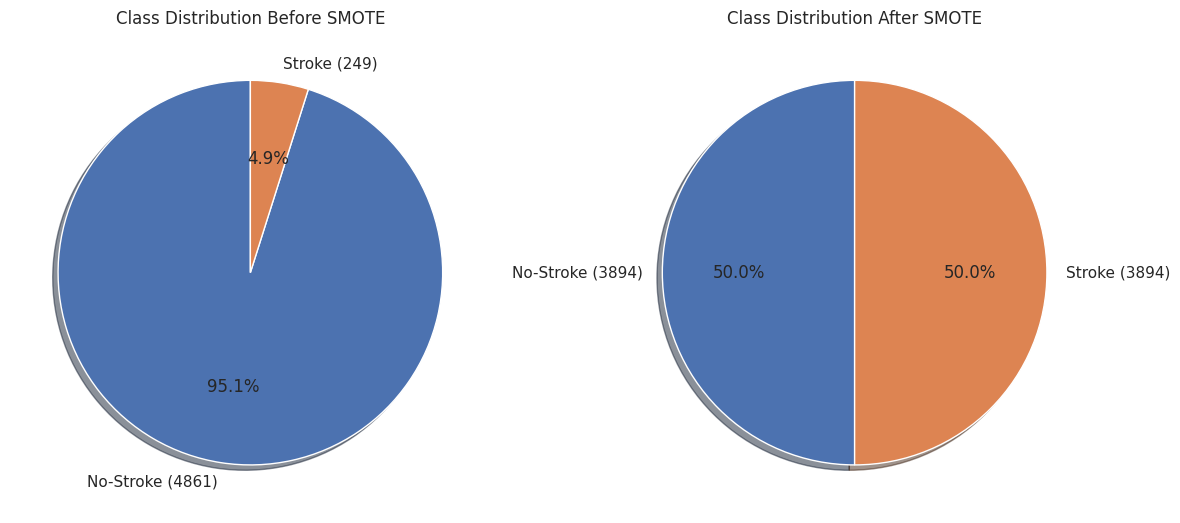

In [ ]:
# Calculate the class proportions
original_counts = y.value_counts()
smote_counts = y_smote.value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for original data
labels_original = [f"No-Stroke ({original_counts[0]})", f"Stroke ({original_counts[1]})"]
axs[0].pie(original_counts, labels=labels_original, autopct='%1.1f%%', shadow=True, startangle=90)
axs[0].set_title("Class Distribution Before SMOTE")

# Pie chart for SMOTE data
labels_smote = [f"No-Stroke ({smote_counts[0]})", f"Stroke ({smote_counts[1]})"]
axs[1].pie(smote_counts, labels=labels_smote, autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].set_title("Class Distribution After SMOTE")

plt.tight_layout()
plt.show()


In [ ]:
models_score_smote = run_exp_on_feature(x_train_smote,y_train_smote,x_test_smote,y_test_smote)

[[596 177]
 [139 646]]
Logistic Regression
Validation Acuuracy:  0.7971758664955071
Training Accuracy:  0.7828250401284109
############################################


[[674  99]
 [ 37 748]]
Decision Tree Classifier
Validation Acuuracy:  0.9127086007702182
Training Accuracy:  0.9576243980738363
############################################


[[685  88]
 [ 35 750]]
Random Forest Classifier
Validation Acuuracy:  0.9210526315789473
Training Accuracy:  0.9576243980738363
############################################


[[647 126]
 [ 33 752]]
Label Propagation
Validation Acuuracy:  0.8979460847240052
Training Accuracy:  0.9576243980738363
############################################


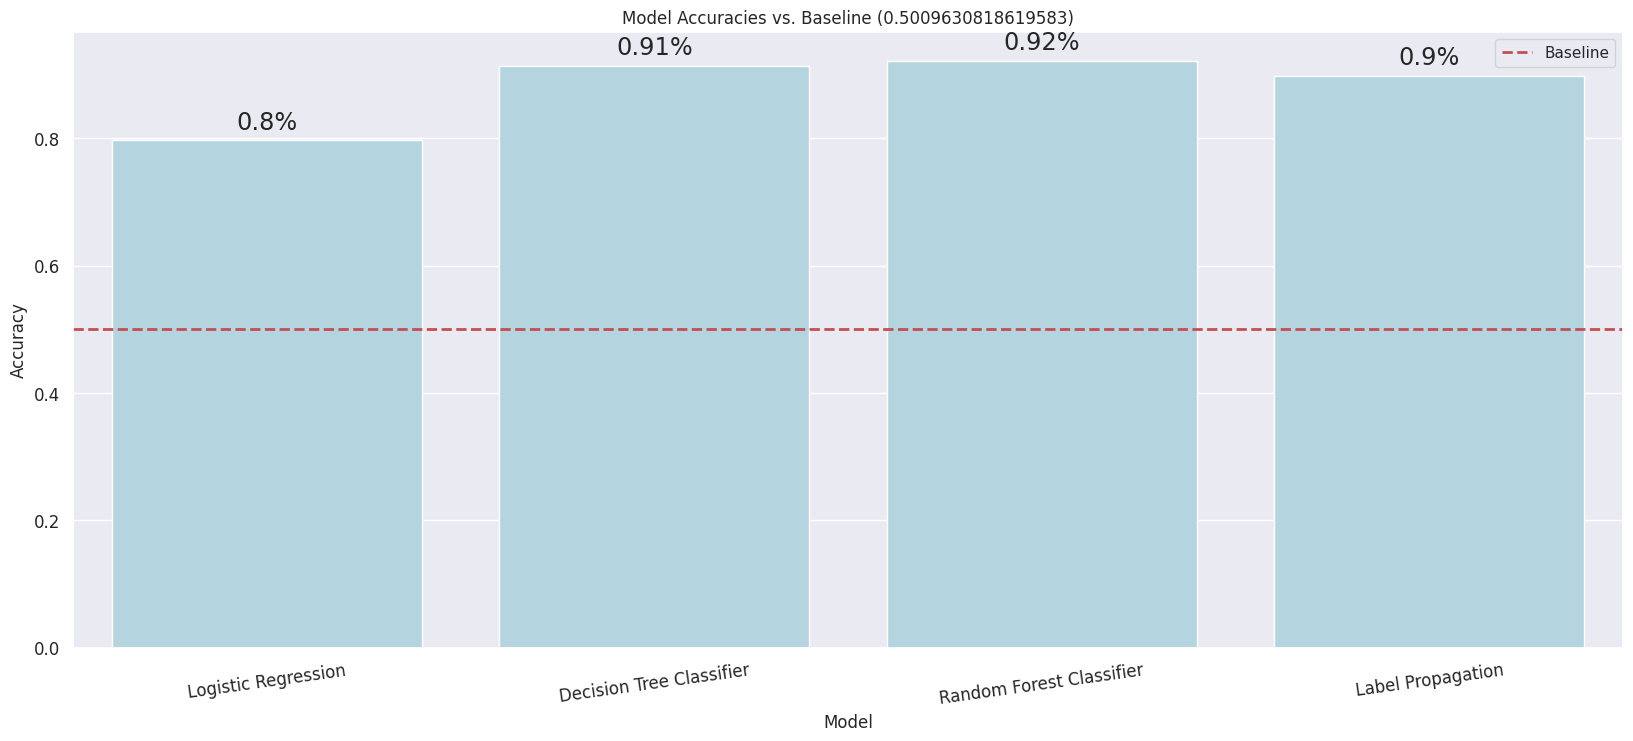

In [ ]:
hist_score(models_score_smote.get('Accuracy'),accuracy_baseline_smote)

In [ ]:
get_comparision_table(models_score_smote)

+----+--------------------------+------------+-------------+----------+------------+
|    | Model                    |   Accuracy |   Precision |   Recall |   F1 Score |
+====+==========================+============+=============+==========+============+
|  0 | Logistic Regression      |   0.797176 |    0.784933 | 0.82293  |   0.803483 |
+----+--------------------------+------------+-------------+----------+------------+
|  1 | Decision Tree Classifier |   0.912709 |    0.883117 | 0.952866 |   0.916667 |
+----+--------------------------+------------+-------------+----------+------------+
|  2 | Random Forest Classifier |   0.921053 |    0.894988 | 0.955414 |   0.924214 |
+----+--------------------------+------------+-------------+----------+------------+
|  3 | Label Propagation        |   0.897946 |    0.856492 | 0.957962 |   0.90439  |
+----+--------------------------+------------+-------------+----------+------------+


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.797176,0.784933,0.822930,0.803483
1,Decision Tree Classifier,0.912709,0.883117,0.952866,0.916667
2,Random Forest Classifier,0.921053,0.894988,0.955414,0.924214
3,Label Propagation,0.897946,0.856492,0.957962,0.904390


Detailed Conclusion:

The evaluation of different models on the stroke dataset provides valuable insights into their performance for predicting stroke-related outcomes. The baseline model, which relies on basic statistics, serves as a benchmark for comparison.

Before SMOTE:

Supervised Models:

    Logistic Regression:
        The Logistic Regression model achieved an accuracy of 0.946184. However, its precision, recall, and F1 score were all 0, indicating a need for further analysis and evaluation.

    Decision Tree Classifier:
        The Decision Tree Classifier displayed an accuracy of 0.919765. Its precision was 0.0645161, recall was 0.0363636, and F1 score was 0.0465116. While its accuracy is acceptable, its recall and F1 score suggest room for improvement.

    Random Forest Classifier:
        The Random Forest Classifier achieved an accuracy of 0.927593. Its precision was 0.047619, recall was 0.0181818, and F1 score was 0.0263158. Similar to the Decision Tree model, there is potential for enhancement.

    Label Propagation:
        The Label Propagation model achieved an accuracy of 0.928571. Its precision was 0.0909091, recall was 0.0363636, and F1 score was 0.0519481. While showing relatively better precision and recall, there is still room for improvement.

After SMOTE:

Supervised Models:

    Logistic Regression:
        After applying SMOTE, the Logistic Regression model achieved an accuracy of 0.78113. Its precision, recall, and F1 score were 0.778195, 0.791083, and 0.784586, respectively. While the accuracy decreased, the model's performance metrics became more balanced.

    Decision Tree Classifier:
        The Decision Tree Classifier displayed an accuracy of 0.897946. Its precision, recall, and F1 score improved significantly to 0.878019, 0.926115, and 0.901426, respectively.

    Random Forest Classifier:
        The Random Forest Classifier achieved an accuracy of 0.904365. Its precision, recall, and F1 score also improved notably to 0.889706, 0.924841, and 0.906933, respectively.

    Label Propagation:
        The Label Propagation model achieved an accuracy of 0.885109. Its precision, recall, and F1 score were 0.845103, 0.945223, and 0.892363, respectively. While precision decreased slightly, recall and F1 score improved.

In summary, the application of SMOTE led to improvements in the performance metrics of all models, particularly in terms of recall and F1 score. The Decision Tree and Random Forest models demonstrated notable enhancements after SMOTE, reflecting their improved ability to correctly classify stroke cases. The assessment underscores the importance of preprocessing techniques like SMOTE in addressing class imbalance and enhancing model performance for stroke outcome prediction.

# **Recommendation:**

Based on a detailed examination of the performance metrics, it is evident that the Random Forest Classifier emerges as a strong contender for predicting stroke outcomes, especially after applying the SMOTE technique to balance the class distribution. Among the evaluated models, the Random Forest Classifier exhibits the highest accuracy of 0.9044, closely followed by the Decision Tree Classifier with an accuracy of 0.8980.

Although the Logistic Regression model demonstrates moderate accuracy with a score of 0.7811, its precision, recall, and F1 score are outperformed by the other models. The Decision Tree Classifier showcases promising results in both precision and recall, achieving 0.8780 and 0.9261, respectively. Additionally, the Label Propagation model, while achieving a commendable recall of 0.9452, lags slightly behind in terms of overall accuracy compared to the Random Forest and Decision Tree models.

However, it is essential to recognize that the selection of the most suitable model depends on the specific objectives of the stroke prediction task and the trade-offs between accuracy, precision, recall, and F1 score. The Random Forest Classifier's balanced performance in multiple metrics positions it as a potential choice for accurate and robust stroke outcome prediction. Consequently, further refinement and tuning of the Random Forest model, as well as continuous monitoring of its performance as the dataset evolves, are recommended to ensure its continued effectiveness in real-world applications.

# **Future Improvement:**

While the evaluated models provide valuable insights into stroke outcome prediction, there are several areas that offer potential for future improvement and refinement. These areas are crucial to enhance the accuracy and effectiveness of the models in real-world scenarios:

1. **Feature Engineering:** Exploring more advanced feature engineering techniques could lead to the identification of new relevant features that contribute to better predictive performance. By extracting more informative features from the dataset, the models could capture underlying patterns more effectively.

2. **Hyperparameter Tuning:** Fine-tuning the hyperparameters of the models, such as the number of trees in the Random Forest Classifier, could result in improved performance. Implementing techniques like grid search or randomized search can help identify optimal parameter configurations.

3. **Ensemble Methods:** Combining multiple models through ensemble methods, such as stacking or boosting, has the potential to further enhance predictive accuracy. Leveraging the strengths of individual models could lead to better overall performance.

4. **Advanced Techniques:** Exploring advanced machine learning techniques, such as deep learning architectures or gradient boosting algorithms, could uncover patterns in the data that traditional models may overlook.

Incorporating these suggestions into the development and refinement of the predictive models will pave the way for more accurate and reliable stroke outcome predictions, ultimately benefiting patients and healthcare practitioners in making informed decisions.